### 猪价及供给端的数据清洗整合

1. 选取数据并进行清洗整合：几个变量处于不同数量级，不同年月日。主要目的是将他们进行日期的统一化和数据正则化。

5大数据：
    - 猪价：日度数据，周末为空白值
    - 能繁存栏：官方给定数据为季度数据，第三方数据一般为月度数据
    - 出栏：官方给定数据为季度数据，第三方的抽样调查为月度数据
    - 屠宰：官方给定数据为季度或月度数据，三方抽样调查为月度数据
    - 出栏均重

能繁、出栏、屠宰、出栏均重为供给端数据，能繁会与PSY以及育肥成活率决定10个月后的市场产能；而出栏有可能并不是全部流入市场，可能在养殖端进行买卖给其他农户做二次育肥；屠宰量为当期流入市场的猪量，和宰后均重共同决定当期流入市场的真正供给量。

变量间理论关系：能繁在后移10个月后应与出栏、屠宰三者呈正相关关系；当屠宰和出栏呈负相关关系时证明出栏的猪并没有完全流入市场，而是有部分流入养殖户手中，若是用于二次育肥，那么后期1-2个月的宰后均重和出栏均重应该有明显增长；当屠宰和出栏关系正常而能繁和猪价关系不正常时要看当期PSY和MSY是否有变化，PSY和MSY的变化可能抹平能繁的异常变化。



In [2]:
# 1.1 猪价季节性特征

# 加载数据包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time
import calendar

In [3]:
# 载入数据，猪价采用钢联数据库提供日度猪价数据
data_price = pd.read_excel("database/GL_20230227.xlsx", sheet_name="外三元现货价（2013年起）")

In [4]:
# 转换行列名
data_price.columns = ["日期", "价格"]
data_price = data_price.drop(index=0)

In [5]:
data_price["日期"] = pd.to_datetime(data_price["日期"])
data_price = data_price.set_index("日期")
# 使用2013-2022年数据
data_use = data_price['2013' : '2022']

C:\Users\admin\AppData\Local\Temp\ipykernel_8060\3064992668.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data_use = data_price['2013' : '2022']


In [6]:
data_monthly = data_use.groupby([data_use.index.year, data_use.index.month]).mean()
list1 = data_monthly.index.to_list()
# 获取年份和月份列表
years = data_use.index.year.unique()
months = data_use.index.month.unique()
# 排序
months = months.sort_values(ascending=True)
years = years.sort_values(ascending=True)
data_monthly = data_monthly.sort_index(ascending=True)

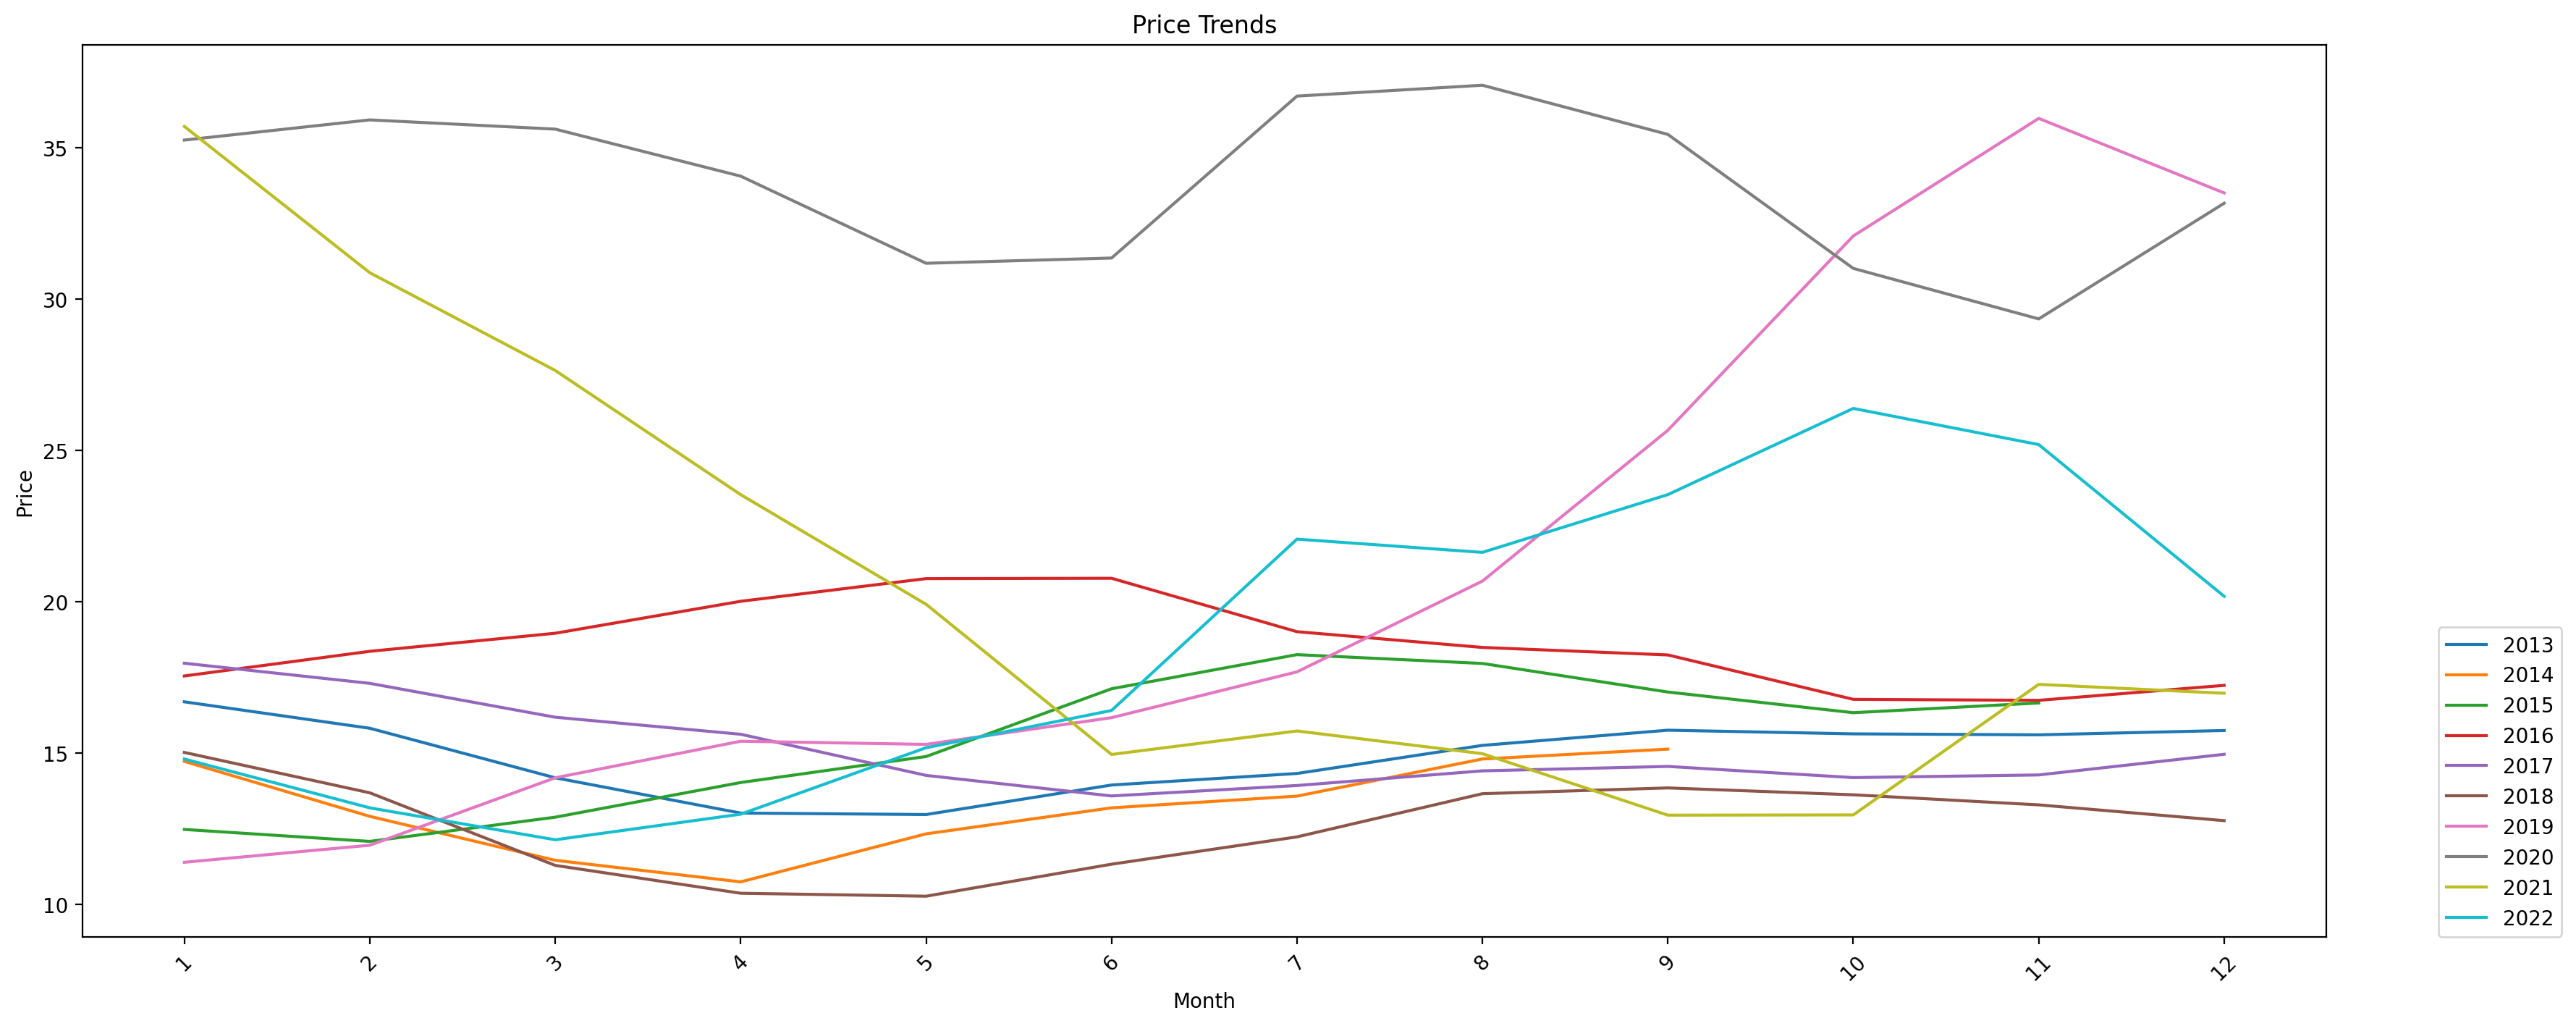

In [7]:
x = range(len(months))
fig = plt.figure(figsize=(20, 8), dpi=200)
# 绘制折线图
for year in years:
    # 创建空列表储存月度价格
    price = []
    for month in months:
        if (year, month) in list1:
            price.append(data_monthly.loc[(year, month), '价格'])
        else:
            continue
    x = range(len(price))
        # 绘制折线图
    plt.plot(x, price, label=f'{year}')

# 添加标签和标题
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price Trends')

# 添加图例
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
# 设置x轴
plt.xticks(x, months, rotation = 45)# plt.xticks(range(len(x_ticks)), x_ticks, rotation=45, ha='right')
# 显示图形
plt.show()


但是月份图无法看出过年前的季节性涨价特征，所以换成日度折线图

In [30]:
data_daily = data_use
data_daily = data_daily.sort_index(ascending=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_8060\969575872.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  priceList = data_daily[f'{year}'].loc[:, '价格'] # 获取每年价格


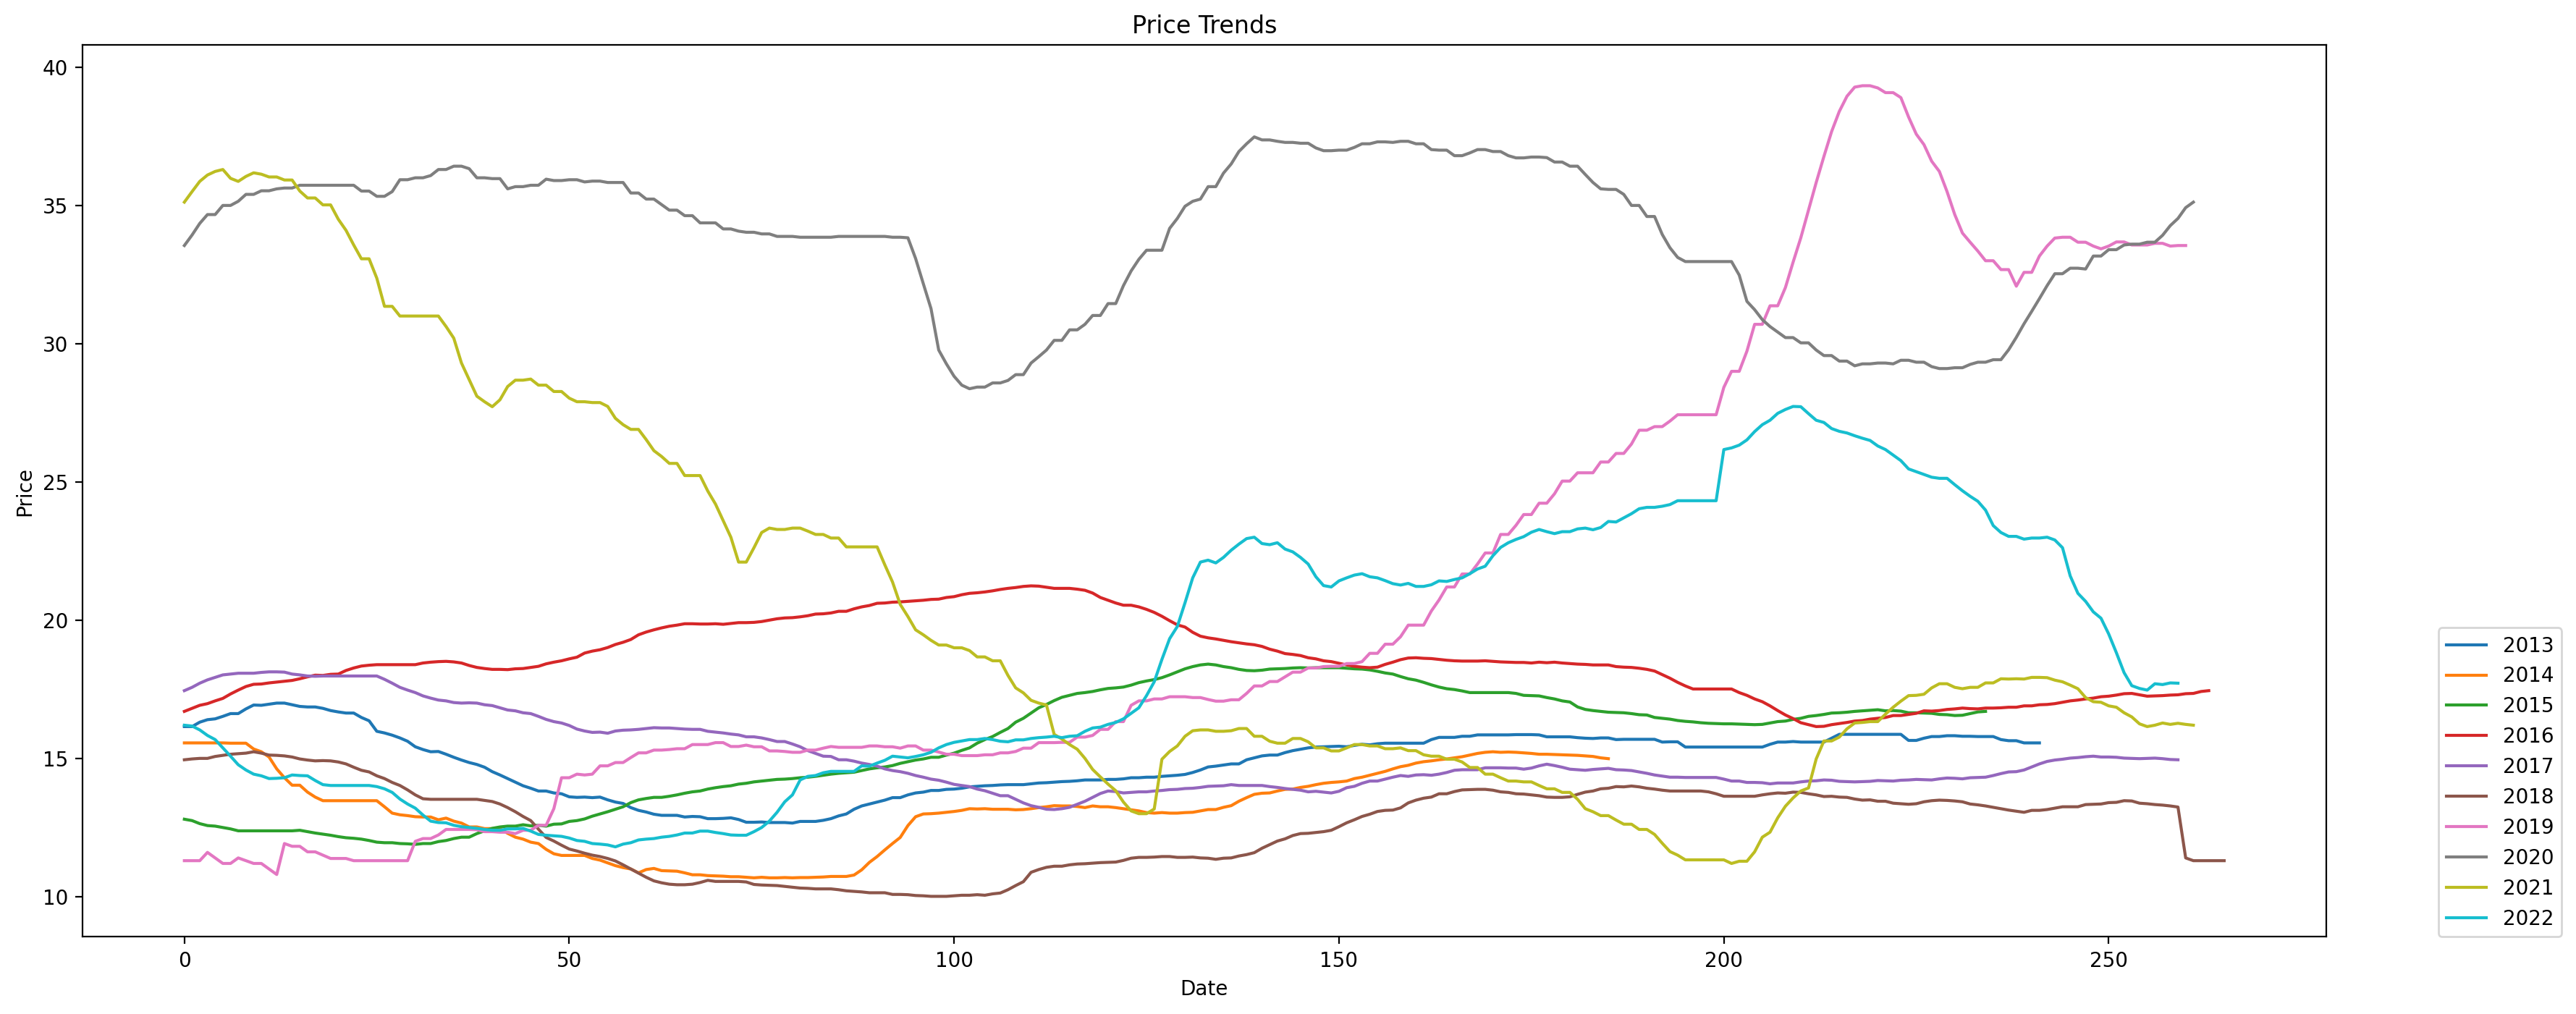

In [31]:
fig = plt.figure(figsize=(20, 8), dpi=200)
for year in years:
    priceList = data_daily[f'{year}'].loc[:, '价格'] # 获取每年价格
    x = range(len(priceList)) # 获取每年对应月日，用下个模块的公式
    plt.plot(x, priceList, label = f'{year}')

# 添加标签和标题
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Trends')

# 添加图例
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
# 设置x轴
# plt.xticks(x, calendar.month_name[1:13], rotation = 45)# plt.xticks(range(len(x_ticks)), x_ticks, rotation=45, ha='right')
# 显示图形
plt.show()

In [24]:
data_test = data_daily["2022"]
data_test2 = data_daily['2021']

C:\Users\admin\AppData\Local\Temp\ipykernel_8060\3502351108.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_test = data_daily["2022"]
C:\Users\admin\AppData\Local\Temp\ipykernel_8060\3502351108.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_test2 = data_daily['2021']


In [12]:
data_test

,价格
日期,
2022-12-30,17.72
2022-12-29,17.73
2022-12-28,17.67
2022-12-27,17.7
2022-12-26,17.47
...,...
2022-01-07,15.68
2022-01-06,15.83
2022-01-05,16.03


In [25]:
date = data_test.index.to_list()
date2 = data_test2.index.tolist()

In [26]:
date1 = []
for i in date:
    i = i.strftime('%m-%d')
    date1.append(i)

date3 = []
for i in date2:
    i = i.strftime('%m-%d')
    date3.append(i)

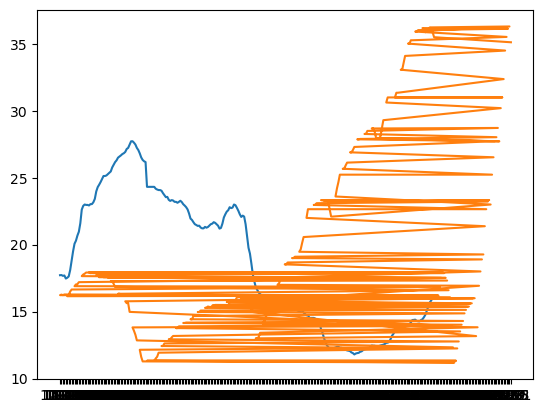

In [27]:
date1

# plt.xticks(range(len(date1)), date1, rotation = 45)# plt.xticks(range(len(x_ticks)), x_ticks, rotation=45, ha='right')
plt.plot(date1, data_test['价格'])
plt.plot(date3, data_test2['价格'])